## Data Scientists Salaries

### Overview

Data science jobs are some of the fastest-growing, most in-demand in technology. Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.

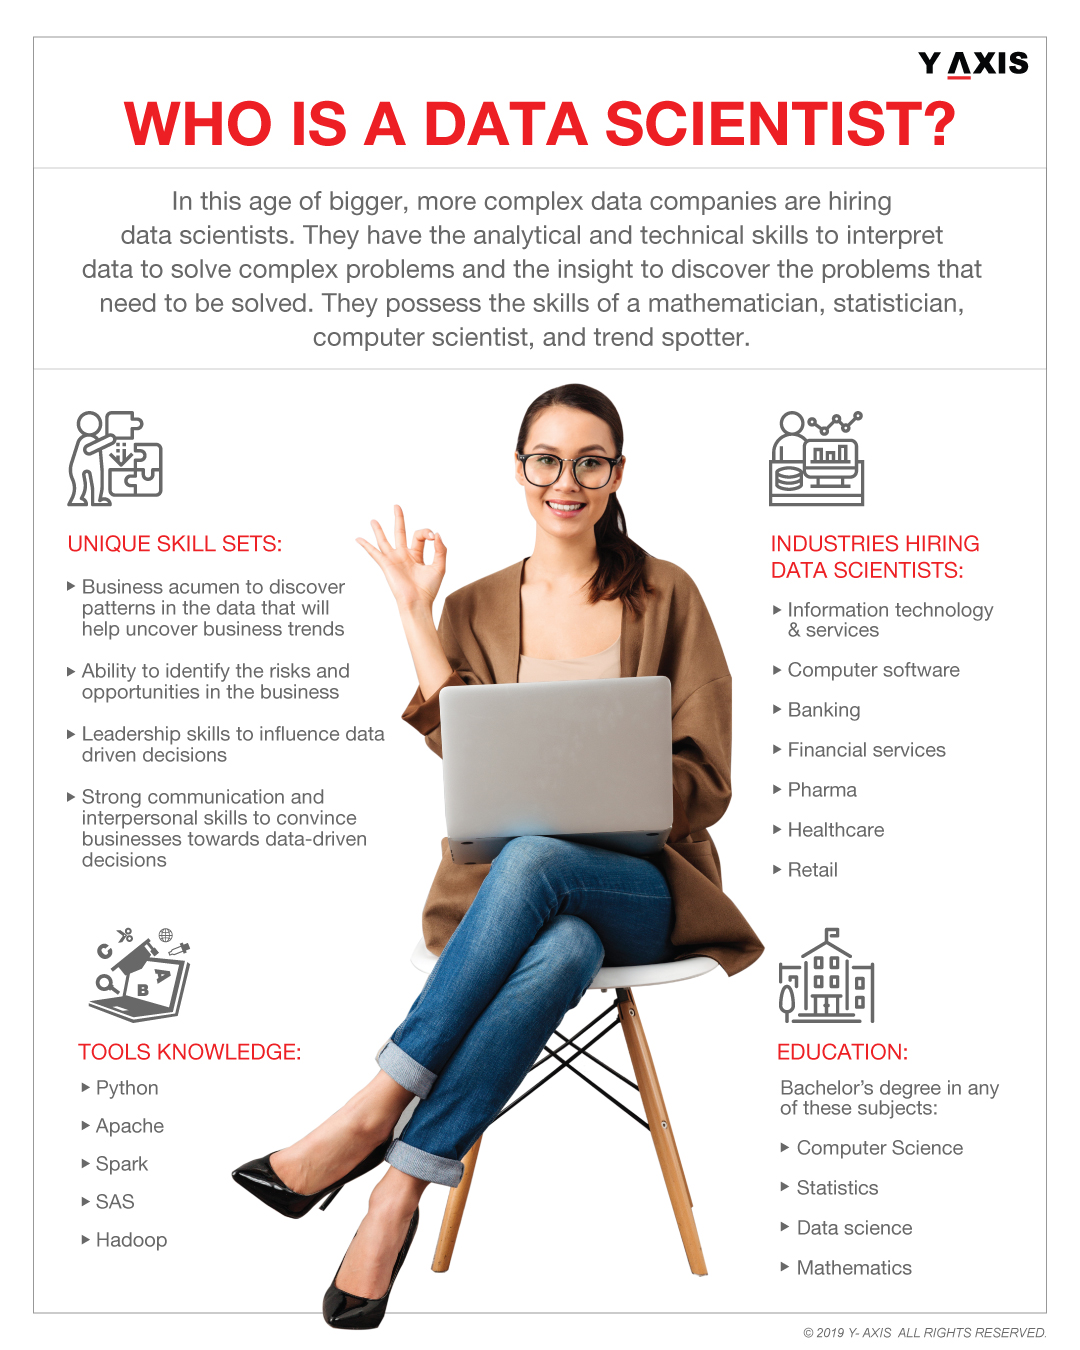

### Feature Description

work_year - The year the salary was paid.

experience_level - The experience level in the job during the year with the following possible values:
- EN: Entry Level / Junior
- MI: Mid Level / Intermediate
- SE: Senior Level / Expert
- EX: Executive Level / Director

employment_type - The type of employement for the role: 
- PT: Part-time 
- FT: Full-time 
- CT: Contract 
- FL: Freelance

job_title - The role worked in during the year.

salary - The total gross salary amount paid. 

salary_currency - The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd - The salary in USD (FX rate divided by average USD rate for the respective year via fxdata.foorilla.com).

employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code. 

remote_ratio - The overall amount of work done remotely, possible values are as follows:
- 0: no remote work (less than 20%)
- 50: Partially remote
- 100: Fully remote (more than 80%)

company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code. 

company_size - The average number of people that worked for the company during the year:
- S: Less than 50 employees (small)
- M: 50 to 250 employees (medium)
- L: more than 250 employees (large)

### Goal of the Notebook

- Explore every feature in the dataset.
- Work year analysis (with salary, remote ratio).
- Experience level analysis (with employment type, top 3 job titles, company size).
- Company location analysis (with experience level).
- Salary analysis (with work year, experience level, company size, job title, remote ratio).

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd()

'/Users/boluwatifeoduyemi/Documents/Data Science/10Alytics Full Stack Training/Internship/Data Scientist Salaries - EDA'

In [3]:
# Import the dataset

ds_data = pd.read_csv('ds_salaries.csv')
ds_data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
# We have to drop the column 'Unnamed'

ds_data = ds_data.drop(['Unnamed: 0'], axis=1)

In [5]:
ds_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
ds_data.shape

(607, 11)

In [7]:
# Check for missing values

ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [8]:
ds_data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
ds_data.describe().astype(int)

,work_year,salary,salary_in_usd,remote_ratio
count,607,607,607,607
mean,2021,324000,112297,70
std,0,1544357,70957,40
min,2020,4000,2859,0
25%,2021,70000,62726,50
50%,2022,115000,101570,100
75%,2022,165000,150000,100
max,2022,30400000,600000,100


In [10]:
ds_data.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [11]:
# Check unique values in categorical variables

categorical_data = ['experience_level','employment_type','job_title', 'salary_currency', 'employee_residence',
               'company_location','company_size',]

for i in categorical_data:
    print(f'The unique values in {i} are: {str(ds_data[i].unique())}')
    print (f'This feature contains {ds_data[i].nunique()} unique values')
    print('\n')

The unique values in experience_level are: ['MI' 'SE' 'EN' 'EX']
This feature contains 4 unique values


The unique values in employment_type are: ['FT' 'CT' 'PT' 'FL']
This feature contains 4 unique values


The unique values in job_title are: ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Direct

In [12]:
sns.set()

<AxesSubplot:>

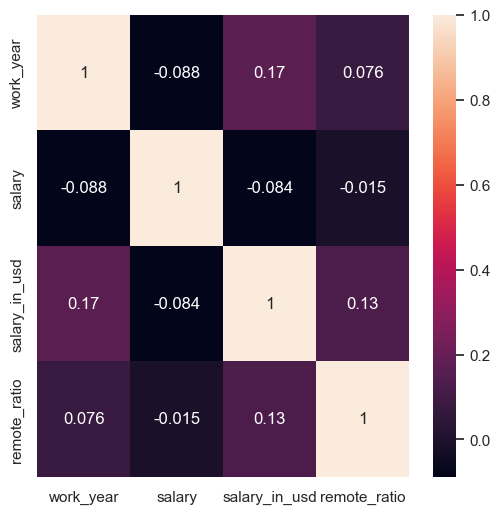

In [13]:
#Visualize Correlations in a heatmap

plt.figure(figsize=(6,6))
sns.heatmap(ds_data.corr(), annot=True)

### Other findings

- The dataset has 607 rows and 11 columns.

- The dataset contains the dollowing data types:
    - 4 floats (int64)
    - 7 strings (object)

- There are no missing values in the dataset.

- The following features are the most occuring in the data set:
    - Senior Level / Expert (SE) experience level occuring 280 times.
    - Full Time (FT) employment type occuring 588 times.
    - Data Scientist job title occuring 143 times.
    - USD salary currency occuring 398 times.
    - Employee residence and company location in the US occuring 332 and 355 times respectively.
    - Medium (M) sized companies with 50 to 250 employees occuring 326 times.

- There is no particular strong correlation between the features.

### Replace Some Categorical Variables

To better understand our dataset, it is important we replace some features. This will provide better insights as we create visualizations. 

In [14]:
# Experience Level
ds_data['experience_level'].replace({'EN':'Entry-Level/Junior', 'MI':'Mid-level/Intermediate',
                                     'SE':'Senior-level/Expert', 'EX':'Executive-level/Director'}, inplace=True)

# Employment Type
ds_data['employment_type'].replace({'FT':'Full-time', 'PT':'Part-time', 'CT':'Contract', 'FL':'Freelance'},
                                   inplace=True)

# Remote Ratio
ds_data['remote_ratio'].replace({0:'No Remote', 50:'Partially Remote', 100:'Fully Remote'}, inplace=True)

# Company Size
ds_data['company_size'].replace({'S':'< 50 employees', 'M':'50 to 250 employees', 'L':'> 250 employees'},
                                   inplace=True)

In [15]:
ds_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,70000,EUR,79833,DE,No Remote,DE,> 250 employees
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,USD,260000,JP,No Remote,JP,< 50 employees
2,2020,Senior-level/Expert,Full-time,Big Data Engineer,85000,GBP,109024,GB,Partially Remote,GB,50 to 250 employees
3,2020,Mid-level/Intermediate,Full-time,Product Data Analyst,20000,USD,20000,HN,No Remote,HN,< 50 employees
4,2020,Senior-level/Expert,Full-time,Machine Learning Engineer,150000,USD,150000,US,Partially Remote,US,> 250 employees


The next set of steps below are a detailed exploratory data analysis of the dataset. The following are displayed in the charts below:

- Univariate Analysis
    - Expreience levels
    - Job titles
    - Employment type
    - Employee residence and company location
    - Company size
    - Work Year
    - Salary in USD
    - Remote ratio
    
- Work Year Analysis

- Experience Level Analysis
    - Employment type by experience level
    - Top three job titles by experience level
    - Company size by experience level
    
- Company Location Analysis

- Salary Analysis
    - Salary by work year
    - Salary by experience level
    - Salary by company size
    - Highest salaries by job titles
    - Average salary by company location

### Univariate Analysis

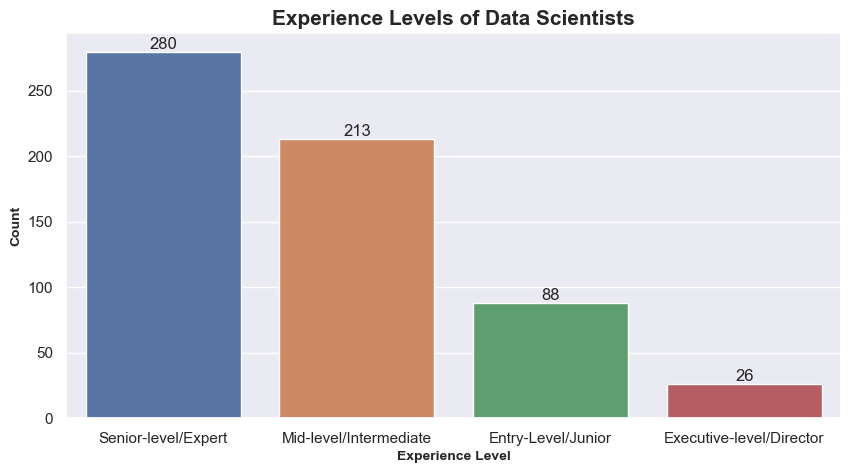

In [16]:
plt.figure(figsize=(10,5))
plt.title('Experience Levels of Data Scientists', fontsize=15, fontweight='bold')
ax = sns.countplot(x='experience_level', data=ds_data, order=ds_data['experience_level'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Experience Level', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.show()

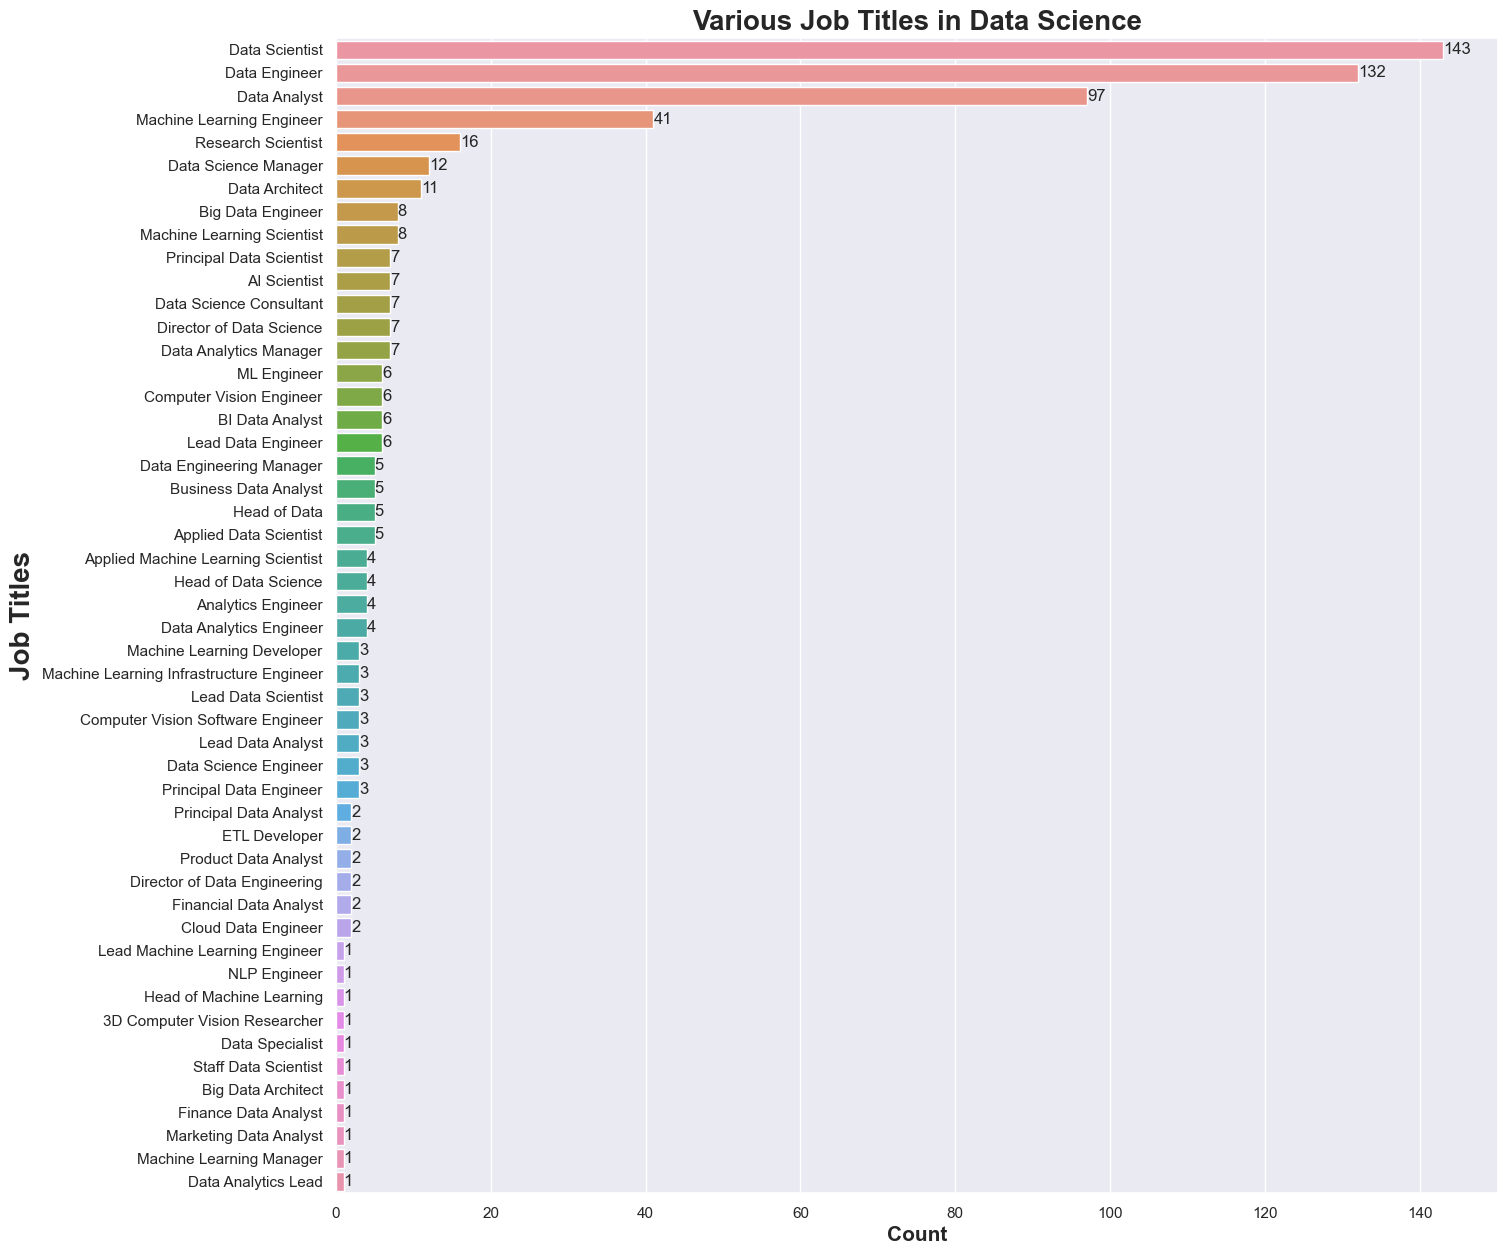

In [17]:
plt.figure(figsize=(15,15))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
ax = sns.countplot(y='job_title', data=ds_data, order=ds_data['job_title'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=20, fontweight='bold')
plt.show()

The information displayed above can be represented in a word cloud chart. The size of each job title displayed in the word cloud represents the number of people employed in that role. 

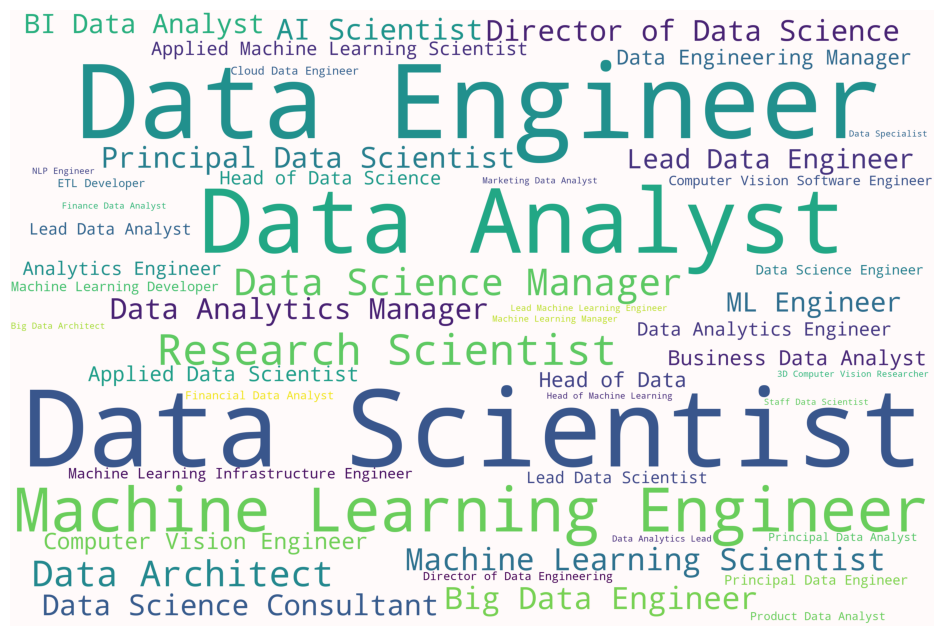

In [18]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from collections import Counter

jobs=Counter(ds_data.job_title)

plt.figure(figsize=(12,8))
wordcloud = WordCloud(width=3000, height=2000, background_color='snow', collocations= False, stopwords=STOPWORDS,
prefer_horizontal=1).generate_from_frequencies(jobs)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

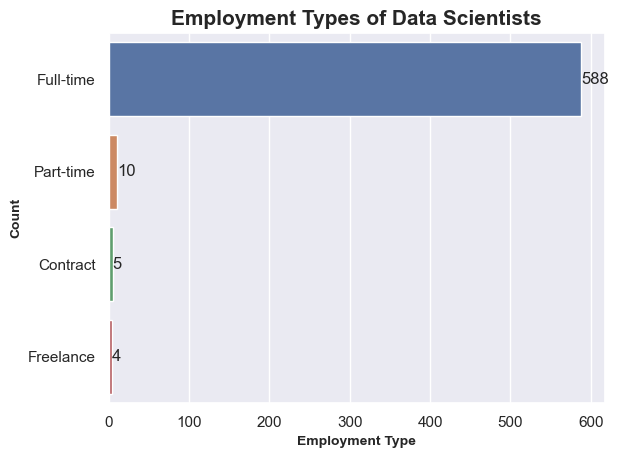

In [19]:
plt.title('Employment Types of Data Scientists', fontsize=15, fontweight='bold')
ax = sns.countplot(y='employment_type', data=ds_data, order=ds_data['employment_type'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Employment Type', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.show()

#### Employee Residence and Company Location

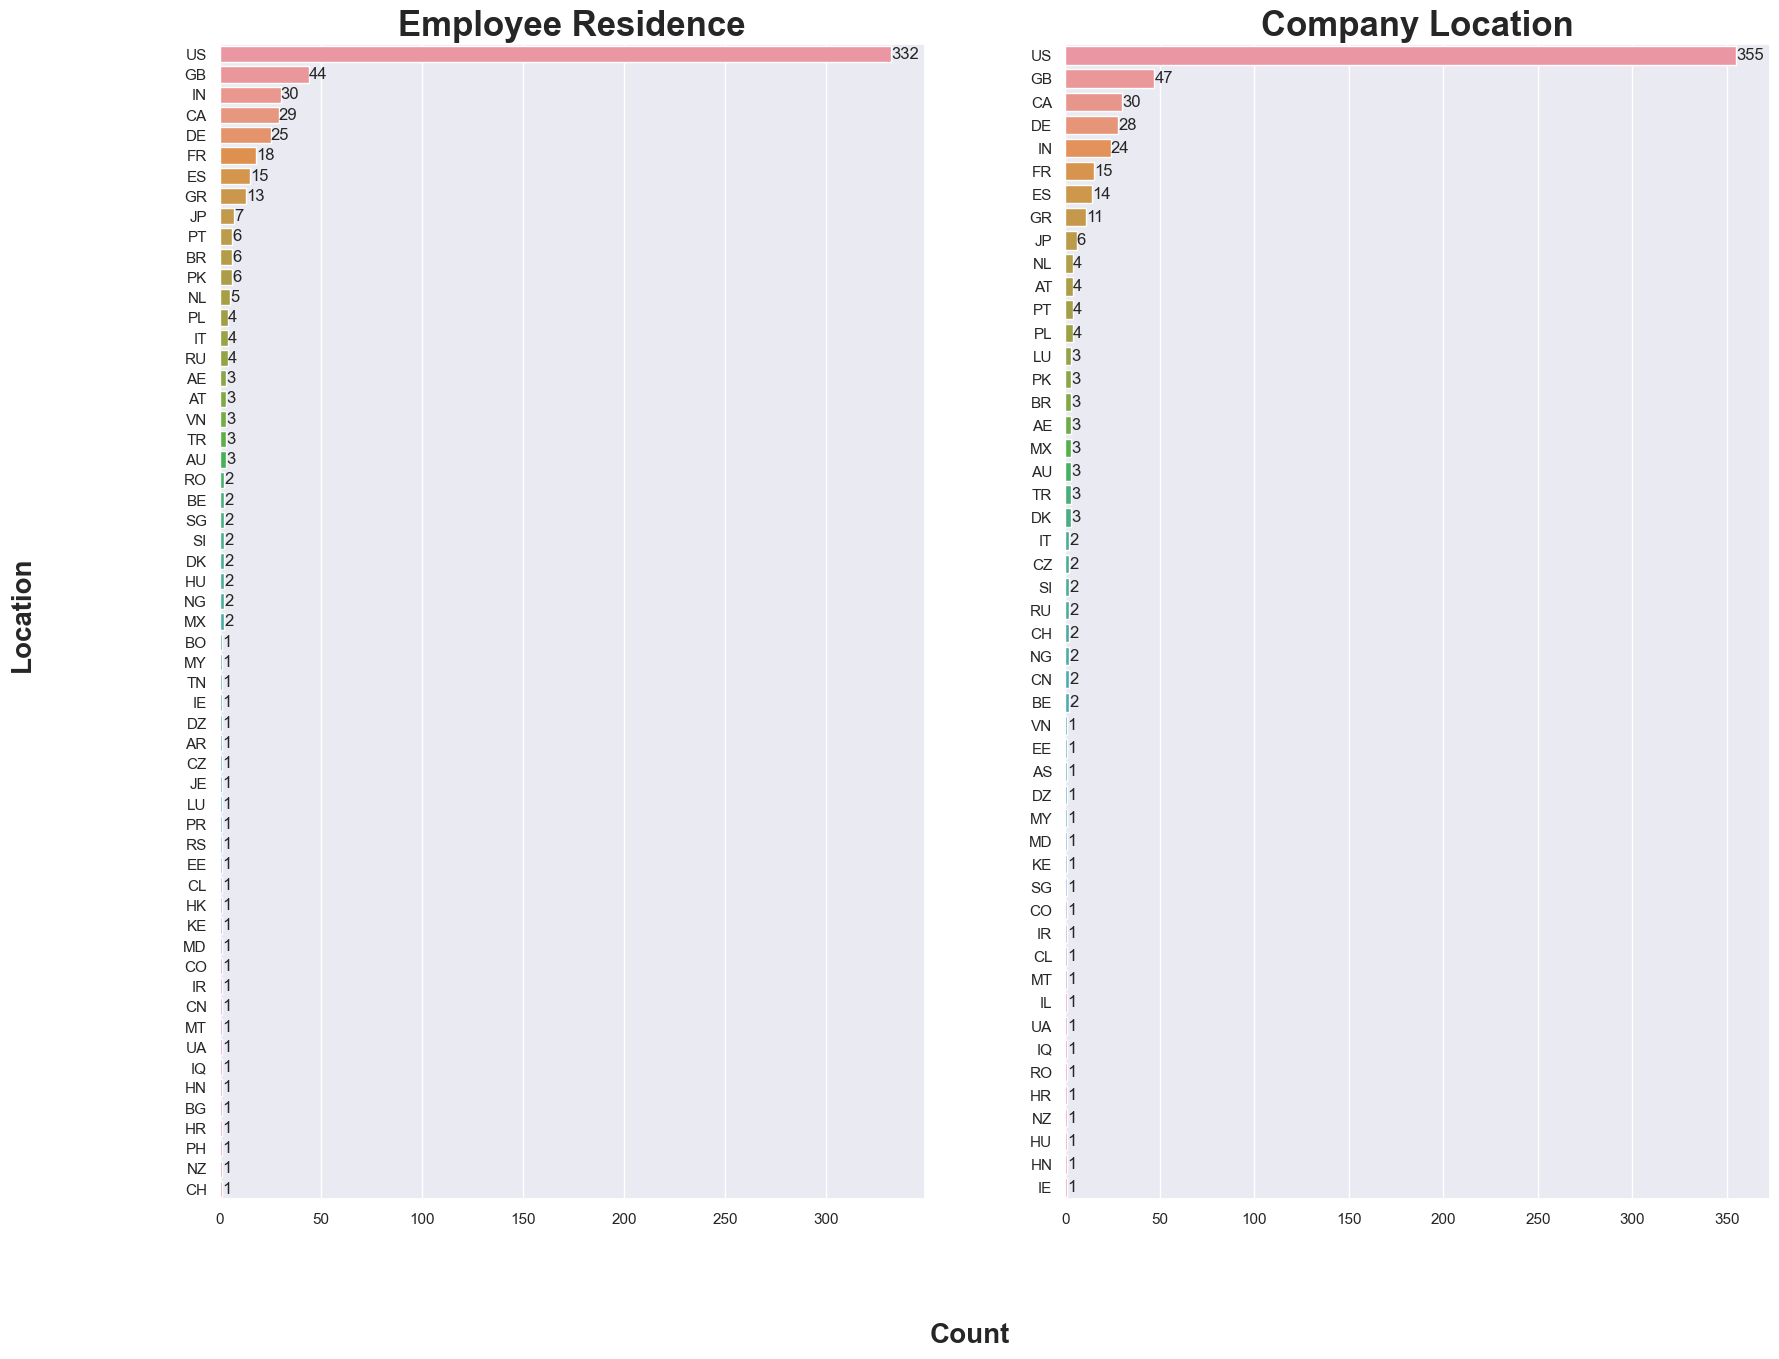

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(20,15))

ax_1 = sns.countplot(y='employee_residence', data=ds_data, order=ds_data['employee_residence'].value_counts().index, 
                     ax=axes[0])
for i in ax_1.containers:
    ax_1.bar_label(i)
ax_2 = sns.countplot(y='company_location', data=ds_data, order=ds_data['company_location'].value_counts().index, 
                     ax=axes[1])
for i in ax_2.containers:
    ax_2.bar_label(i)

axes[0].set_title('Employee Residence', fontsize=25, fontweight='bold')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set_title('Company Location', fontsize=25, fontweight='bold')
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

fig.supxlabel('Count', fontsize=20, fontweight='bold')
fig.supylabel('Location', fontsize=20, fontweight='bold')

plt.show()

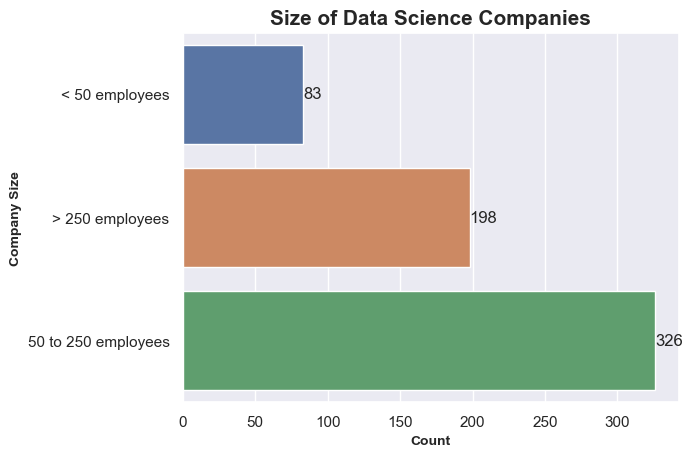

In [21]:
plt.title('Size of Data Science Companies', fontsize=15, fontweight='bold')
ax = sns.countplot(y='company_size', data=ds_data, order=ds_data['company_size'].value_counts().index[::-1])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Count', fontsize=10, fontweight='bold')
plt.ylabel('Company Size', fontsize=10, fontweight='bold')
plt.show()

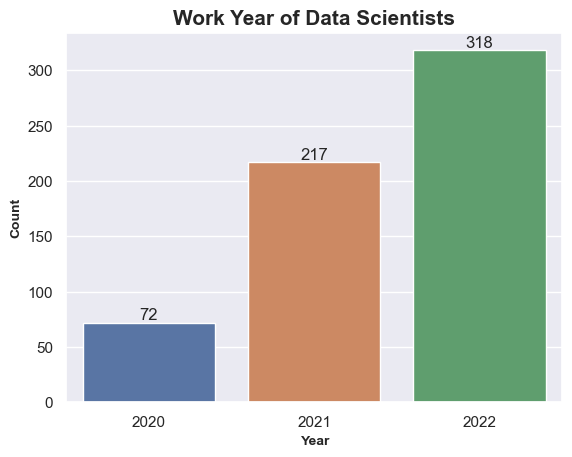

In [22]:
plt.title('Work Year of Data Scientists', fontsize=15, fontweight='bold')
ax = sns.countplot(x='work_year', data=ds_data)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Year', fontsize=10, fontweight='bold')
plt.show()

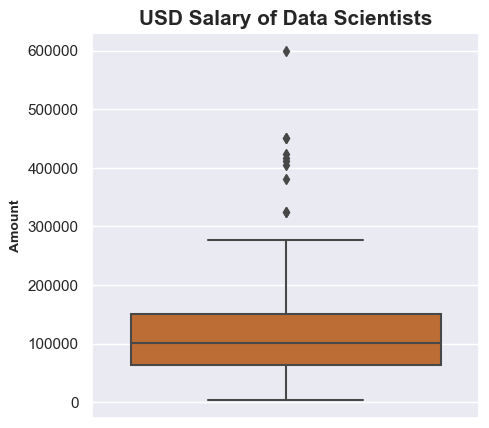

In [23]:
plt.figure(figsize=(5,5))
plt.title('USD Salary of Data Scientists', fontsize=15, fontweight='bold')
sns.boxplot(y='salary_in_usd', data=ds_data, color='chocolate')
plt.ylabel('Amount', fontsize=10, fontweight='bold')
plt.show()

***From the chart above, we can see that the all time highest salary captured in the dataset is 600,000 USD. It exists independently in the chart because it is an outlier.***

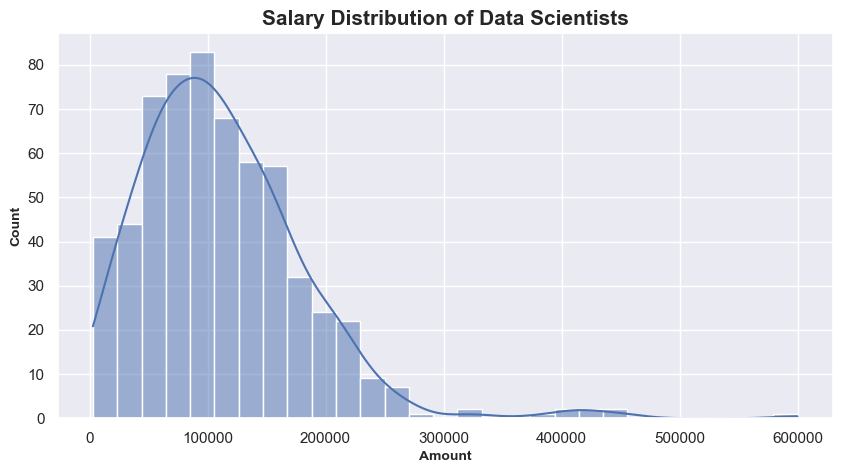

In [24]:
plt.figure(figsize=(10,5))
plt.title('Salary Distribution of Data Scientists', fontsize=15, fontweight='bold')
sns.histplot(x='salary_in_usd', data=ds_data, kde=True)
plt.xlabel('Amount', fontsize= 10, fontweight='bold')
plt.ylabel('Count', fontsize= 10, fontweight='bold')
plt.show()

***Based on the distribution chart shown above, most of the data scientists are paid a salary between 60,000 USD and 100,000 USD.***

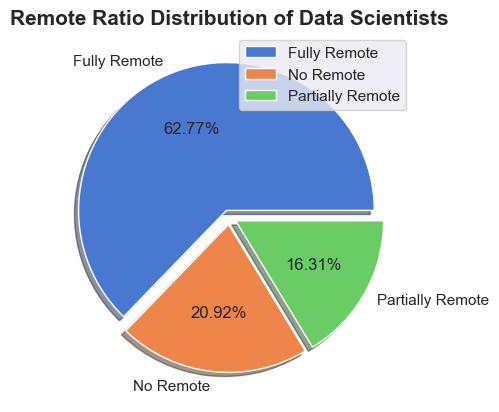

In [25]:
explode= (0.05, 0.05, 0.05)
colors= sns.color_palette('muted')

plt.pie(x= ds_data['remote_ratio'].value_counts().values, 
        labels= ds_data['remote_ratio'].value_counts().index,
        colors=colors,
        autopct= '%.2f%%', 
        explode=explode,
        shadow=True)
plt.title('Remote Ratio Distribution of Data Scientists', fontsize=15, fontweight='bold')
plt.legend()
plt.show()

***The pie chart shown above shows that a larger percentage of the data scientists work on-site.***

***We can validate this by showing the distribution of remote and on-site workers below.***

In [26]:
ds_data.groupby('remote_ratio')['remote_ratio'].count()

remote_ratio
Fully Remote        381
No Remote           127
Partially Remote     99
Name: remote_ratio, dtype: int64

### Work Year Analysis

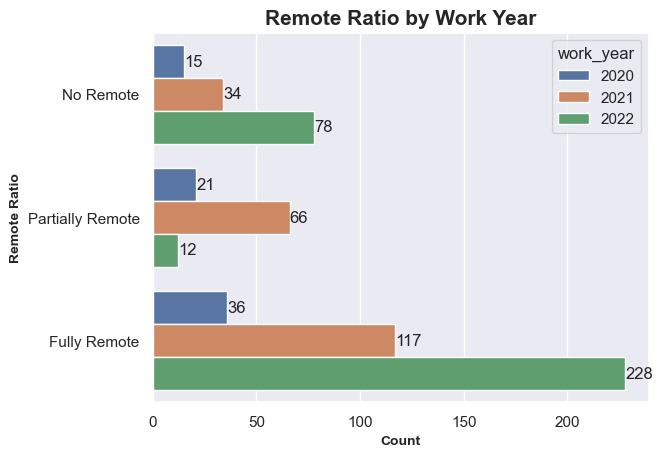

In [27]:
plt.title('Remote Ratio by Work Year', fontsize=15, fontweight='bold')
ax = sns.countplot(y='remote_ratio', hue='work_year', data=ds_data)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Count', fontsize=10, fontweight='bold')
plt.ylabel('Remote Ratio', fontsize=10, fontweight='bold')
plt.show()

### Experience Level Analysis

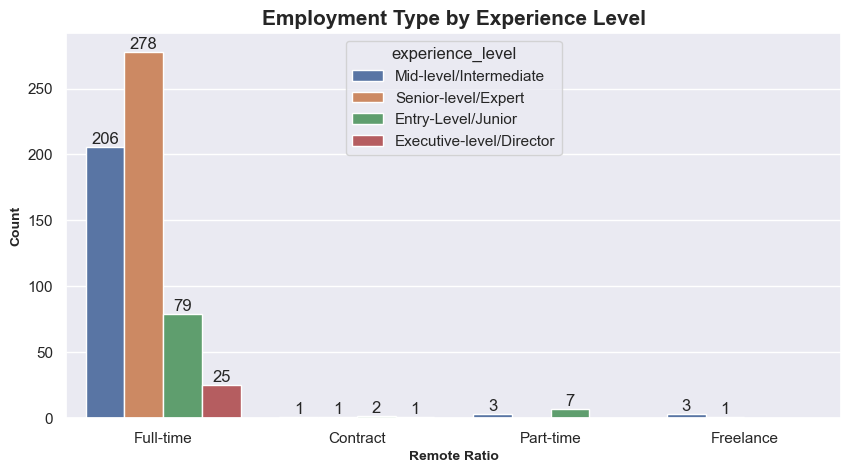

In [28]:
plt.figure(figsize= (10,5))
plt.title('Employment Type by Experience Level', fontsize=15, fontweight='bold')
ax = sns.countplot(x='employment_type', hue='experience_level', data=ds_data)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Remote Ratio', fontsize=10, fontweight='bold')
plt.show()

#### Top Three Job Titles by Experience Level

In the bar chart below, the top three job titles per the experience levels are visualized. In order to do this, the value counts of each of the job titles are displayed. There after, the job titles which have the highest number of workers are extracted.

In [29]:
ds_data['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [30]:
top_three = ds_data['job_title'].value_counts().nlargest(3)
top_three

Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

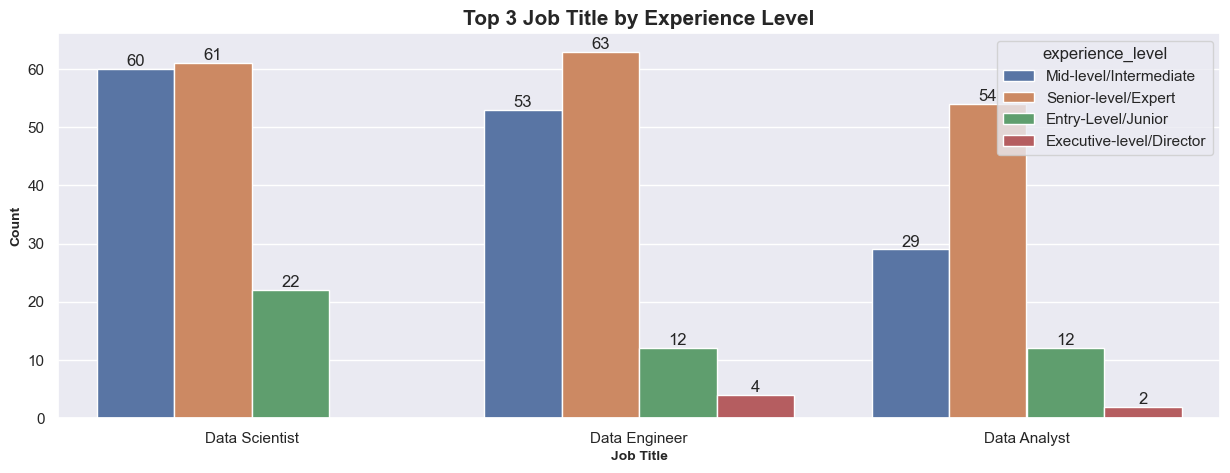

In [31]:
plt.figure(figsize=(15,5))
plt.title('Top 3 Job Title by Experience Level', fontsize=15, fontweight='bold')
ax = sns.countplot(x='job_title', hue='experience_level', data=ds_data, 
              order=ds_data['job_title'].value_counts().iloc[:3].index)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Job Title', fontsize=10, fontweight='bold')
plt.show()

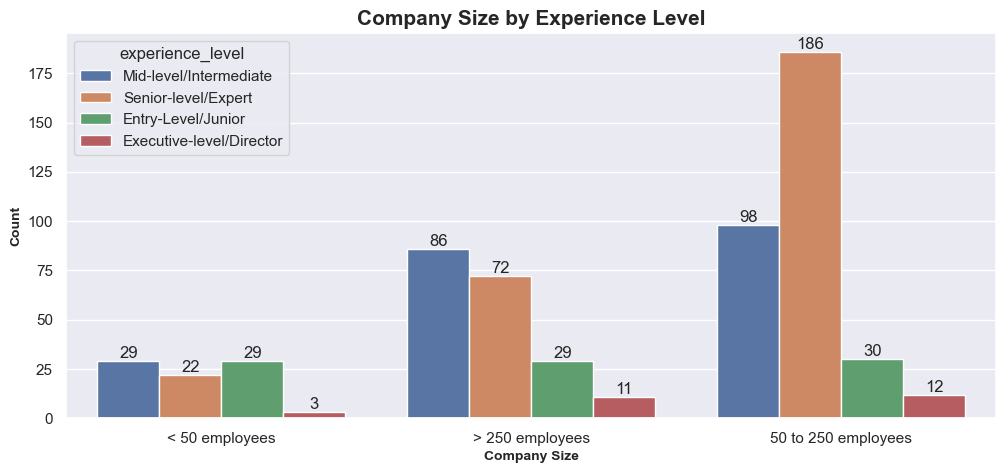

In [32]:
plt.figure(figsize=(12,5))
plt.title('Company Size by Experience Level', fontsize=15, fontweight='bold')
ax = sns.countplot(x='company_size', hue='experience_level', data=ds_data, 
              order=ds_data['company_size'].value_counts().index[::-1])
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Company Size', fontsize=10, fontweight='bold')
plt.show()

### Company Location Analysis

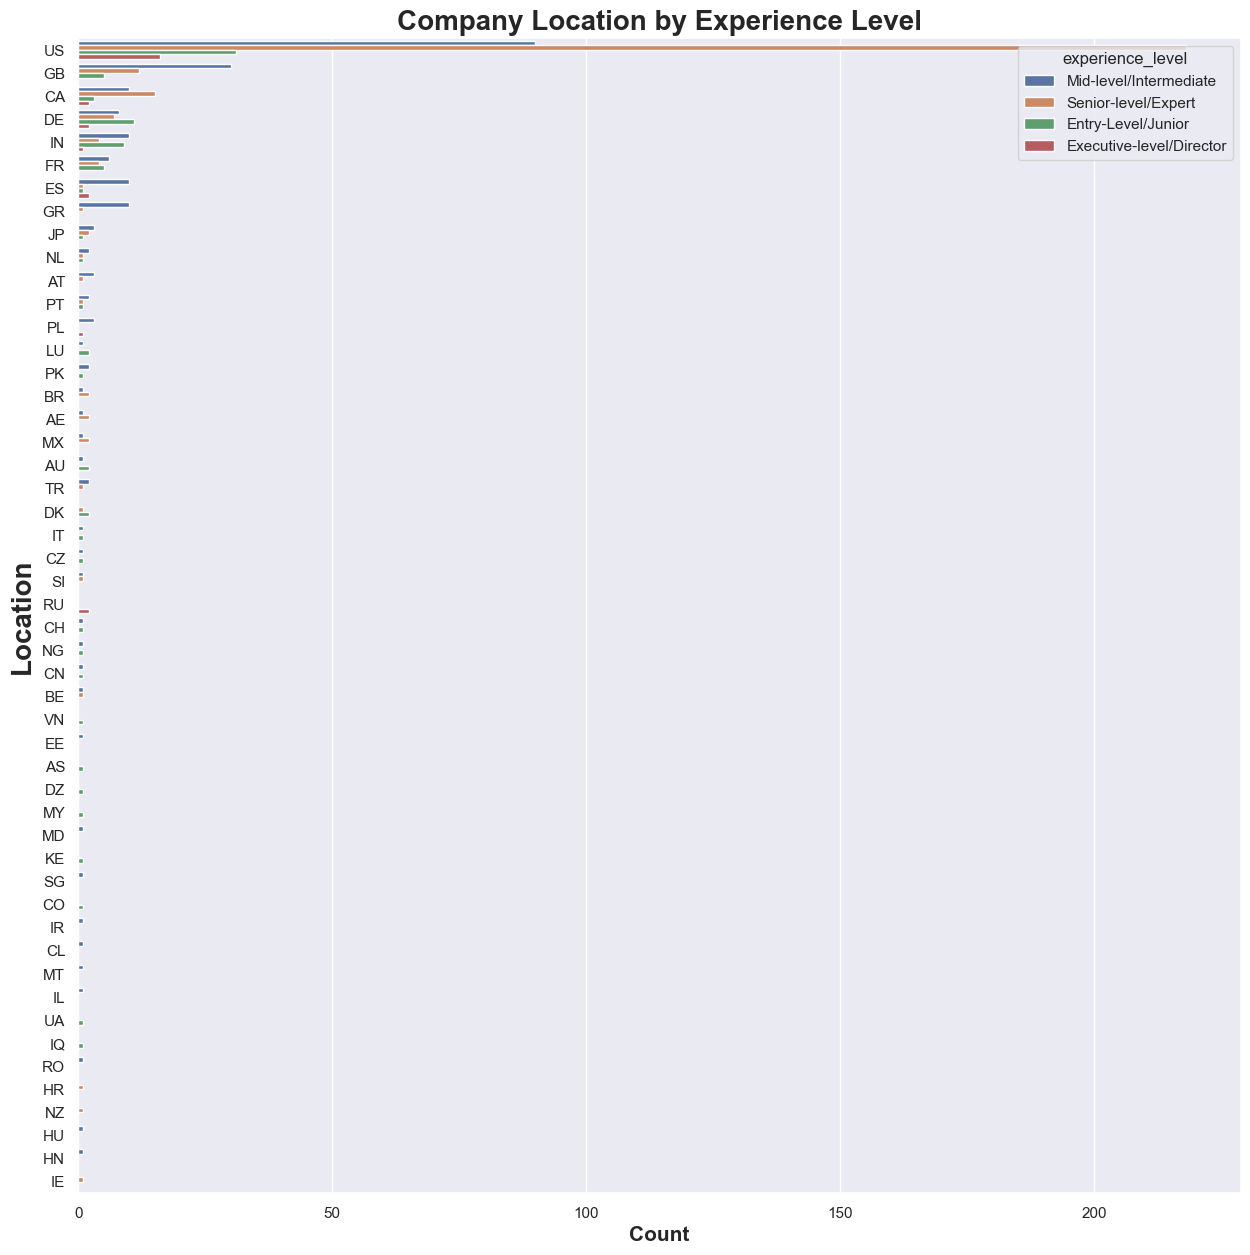

In [33]:
plt.figure(figsize=(15,15))
plt.title('Company Location by Experience Level', fontsize=20, fontweight='bold')
sns.countplot(y='company_location', hue='experience_level', data=ds_data, 
              order=ds_data['company_location'].value_counts().index)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Location', fontsize=20, fontweight='bold')
plt.show()


***From the chart above, it is clear that a higher percentage of the data scientists, captured by the dataset, are located in the United States of America.***

### Salary Analysis

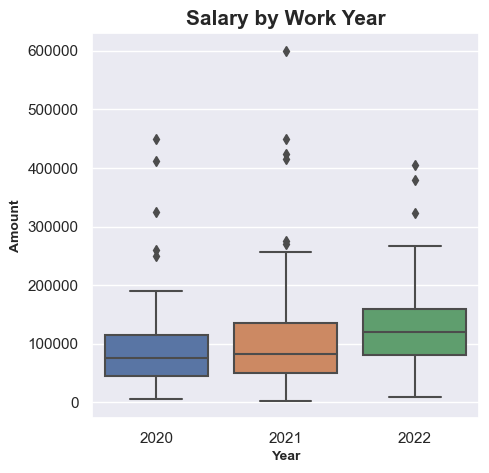

In [34]:
plt.figure(figsize=(5,5))
plt.title('Salary by Work Year', fontsize=15, fontweight='bold')
sns.boxplot(x='work_year', y='salary_in_usd', data=ds_data)
plt.xlabel('Year', fontsize=10, fontweight='bold')
plt.ylabel('Amount', fontsize=10, fontweight='bold')
plt.show()

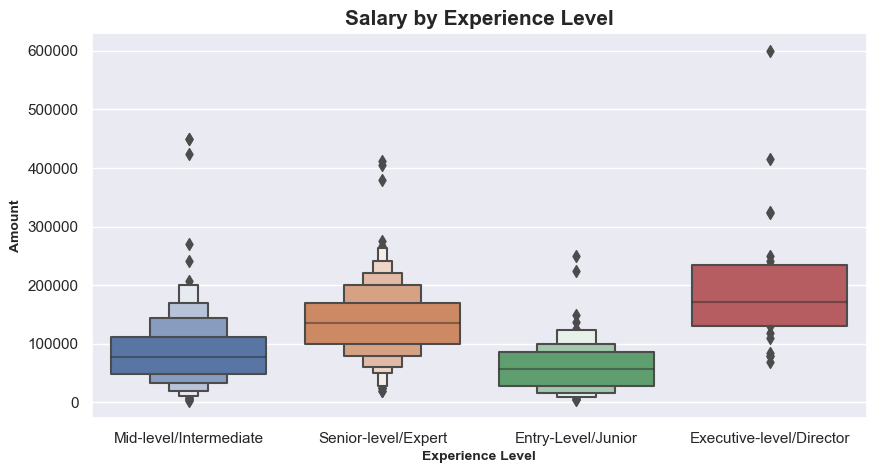

In [35]:
plt.figure(figsize=(10,5))
plt.title('Salary by Experience Level', fontsize=15, fontweight='bold')
sns.boxenplot(x='experience_level', y='salary_in_usd', data=ds_data)
plt.xlabel('Experience Level', fontsize=10, fontweight='bold')
plt.ylabel('Amount', fontsize=10, fontweight='bold')
plt.show()

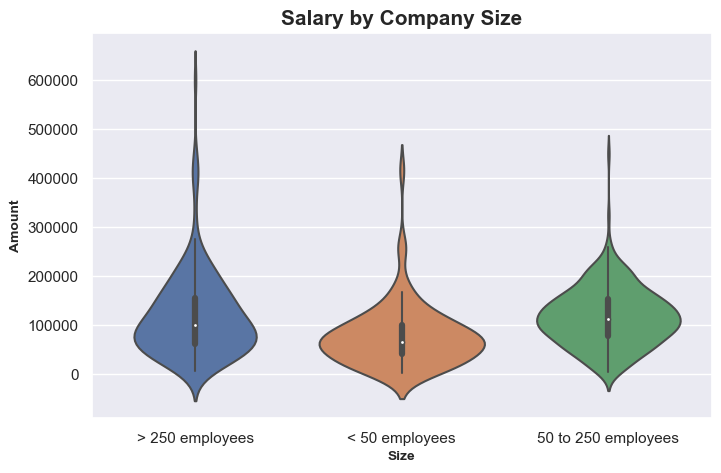

In [36]:
plt.figure(figsize=(8,5))
plt.title('Salary by Company Size', fontsize=15, fontweight='bold')
sns.violinplot(x='company_size', y='salary_in_usd', data=ds_data)
plt.xlabel('Size', fontsize=10, fontweight='bold')
plt.ylabel('Amount', fontsize=10, fontweight='bold')
plt.show()

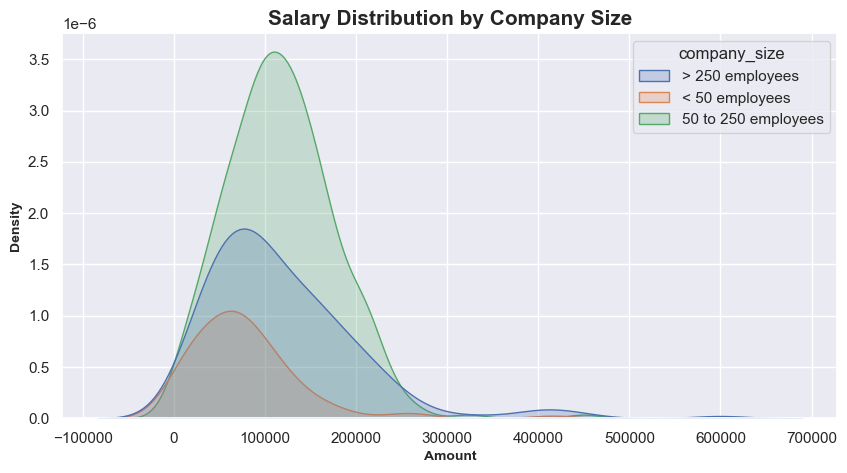

In [37]:
plt.figure(figsize=(10,5))
plt.title('Salary Distribution by Company Size', fontsize=15, fontweight='bold')
sns.kdeplot(x='salary_in_usd', hue='company_size', fill=True, data=ds_data)
plt.xlabel('Amount', fontsize= 10, fontweight='bold')
plt.ylabel('Density', fontsize= 10, fontweight='bold')
plt.show()

In [38]:
ds_data.groupby(['job_title'])['salary_in_usd'].sum().sort_values(ascending=False)

job_title
Data Scientist                              15470860
Data Engineer                               14879700
Data Analyst                                 9010627
Machine Learning Engineer                    4300086
Data Architect                               1956613
Data Science Manager                         1899942
Research Scientist                           1744312
Principal Data Scientist                     1506697
Director of Data Science                     1365518
Machine Learning Scientist                   1267300
Principal Data Engineer                       985000
Data Analytics Manager                        889940
Applied Data Scientist                        878275
Lead Data Engineer                            838347
Head of Data                                  800813
ML Engineer                                   705024
Analytics Engineer                            700000
Data Engineering Manager                      616136
Head of Data Science                

In [39]:
highest_paid_ten = ds_data.groupby(['job_title'])['salary_in_usd'].sum().sort_values(ascending=False).nlargest(10)
highest_paid_ten

job_title
Data Scientist                15470860
Data Engineer                 14879700
Data Analyst                   9010627
Machine Learning Engineer      4300086
Data Architect                 1956613
Data Science Manager           1899942
Research Scientist             1744312
Principal Data Scientist       1506697
Director of Data Science       1365518
Machine Learning Scientist     1267300
Name: salary_in_usd, dtype: int64

Text(0, 0.5, 'Amount')

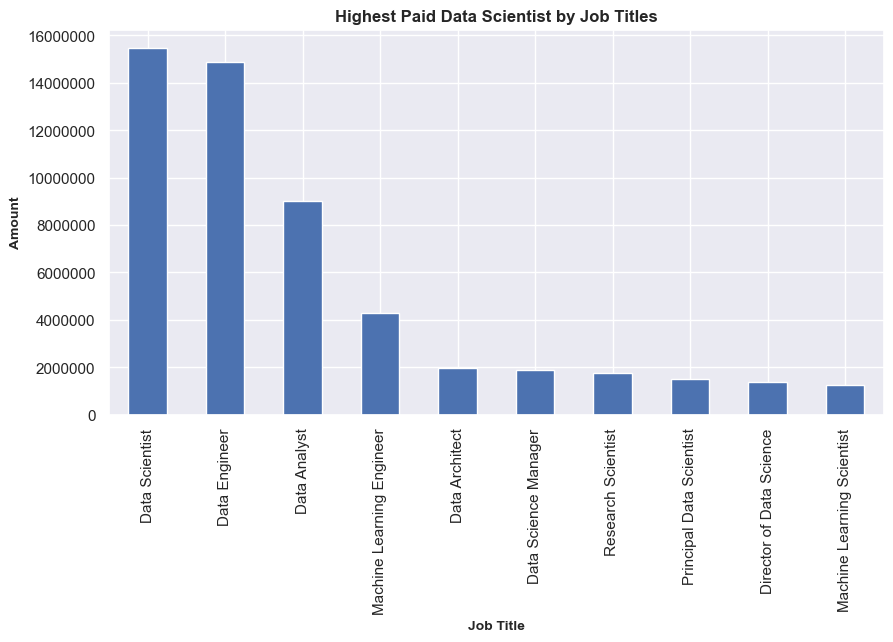

In [40]:
plt.figure(figsize=(10,5))
plt.title('Highest Paid Data Scientist by Job Titles', fontsize=12, fontweight='bold')
plt.ticklabel_format(style='plain')
highest_paid_ten.plot.bar()
plt.xlabel('Job Title', fontsize=10, fontweight='bold')
plt.ylabel('Amount', fontsize=10, fontweight='bold')

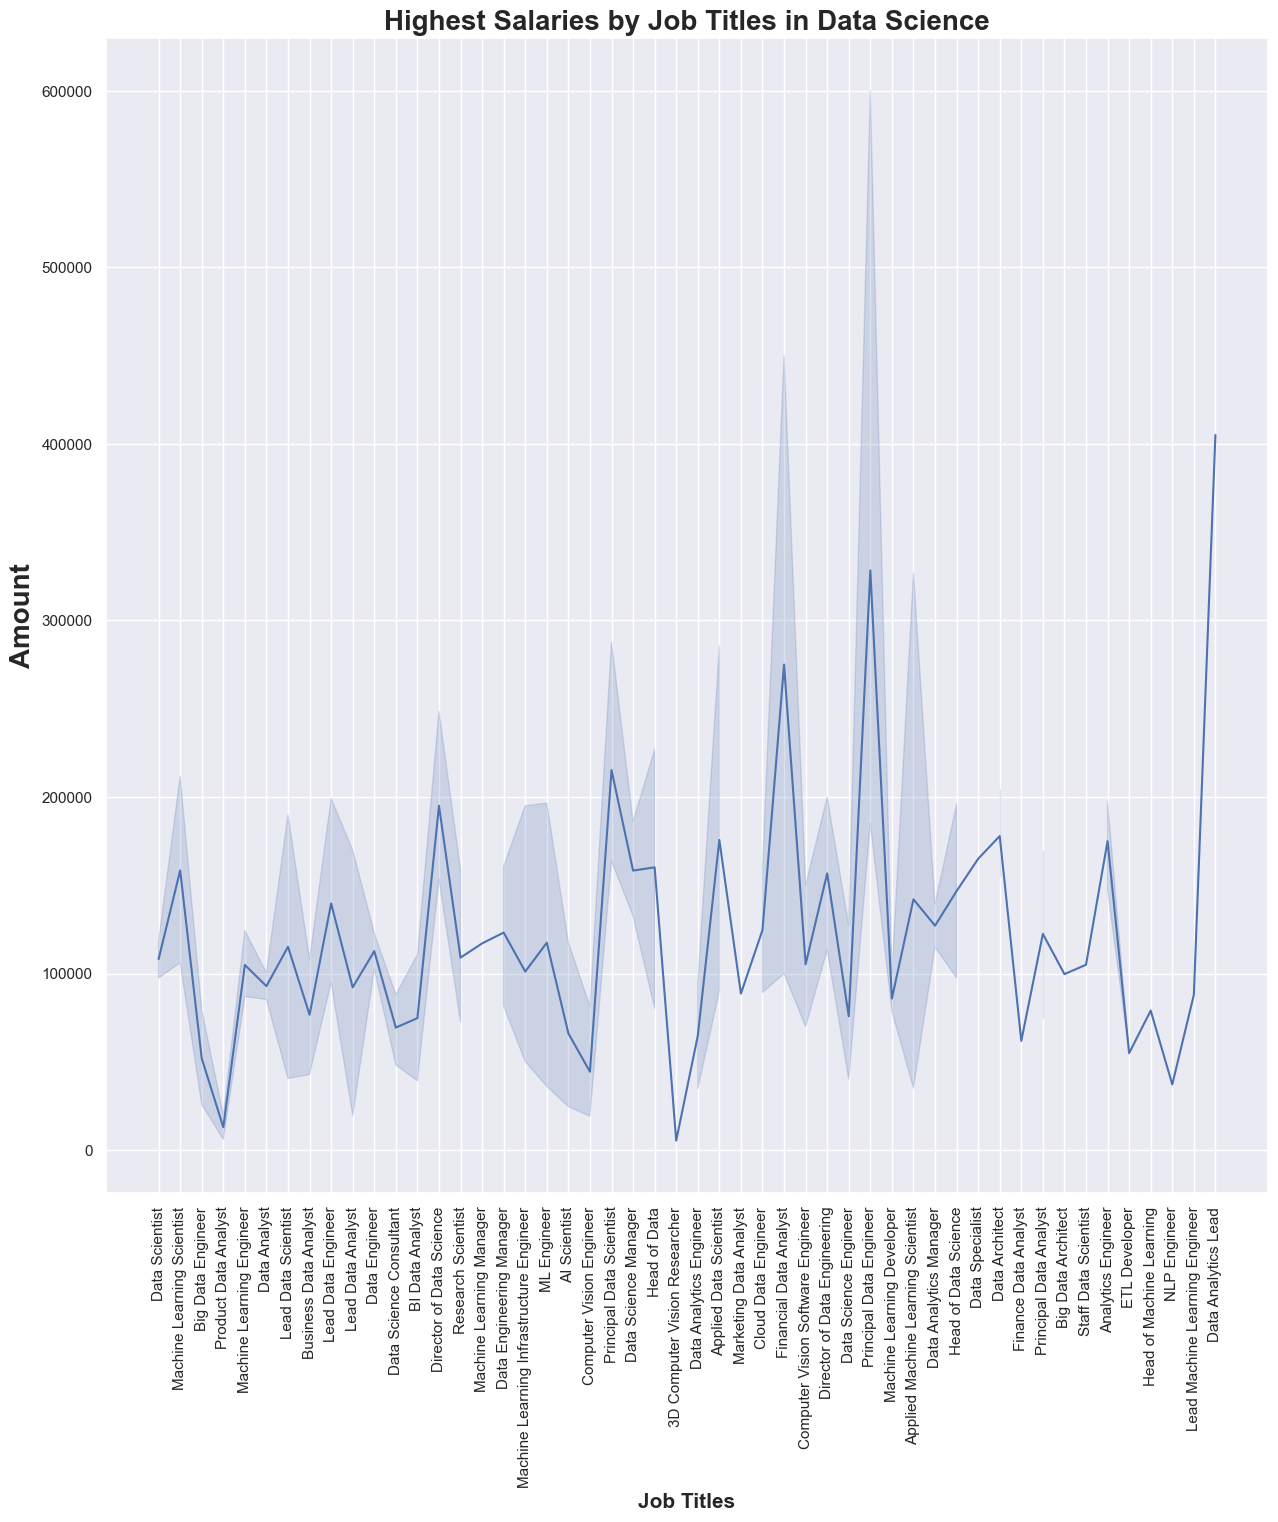

In [41]:
plt.figure(figsize=(15,15))
plt.title('Highest Salaries by Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='job_title', data=ds_data)
plt.xlabel('Job Titles', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [42]:
average_salary_ds = ds_data.groupby(['company_location'])['salary_in_usd'].mean().sort_values(ascending=False)
average_salary_ds

company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
AU    108042.666667
AE    100000.000000
DZ    100000.000000
IQ    100000.000000
CA     99823.733333
SG     89294.000000
BE     85699.000000
DE     81887.214286
GB     81583.042553
AT     72920.750000
CN     71665.500000
IE     71444.000000
PL     66082.500000
CH     64114.000000
FR     63970.666667
SI     63831.000000
RO     60000.000000
NL     54945.750000
DK     54386.333333
ES     53060.142857
GR     52293.090909
CZ     50937.000000
PT     47793.750000
HR     45618.000000
LU     43942.666667
CL     40038.000000
MY     40000.000000
IT     36366.500000
HU     35735.000000
EE     32974.000000
MX     32123.333333
NG     30000.000000
IN     28581.750000
MT     28369.000000
CO     21844.000000
TR     20096.666667
HN     20000.000000
BR     18602.666667
AS     18053.000000
MD     18000.000000
UA     13400.000000
PK     13333.333333
KE      9272.000000
IR      4000.000000
VN 

Text(0, 0.5, 'Amount')

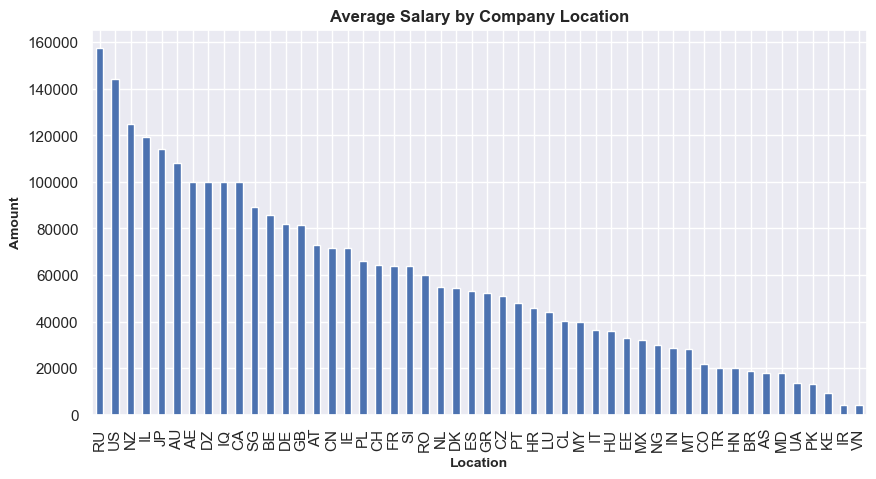

In [43]:
plt.figure(figsize=(10,5))
plt.title('Average Salary by Company Location', fontsize=12, fontweight='bold')
average_salary_ds.plot.bar()
plt.xlabel('Location', fontsize=10, fontweight='bold')
plt.ylabel('Amount', fontsize=10, fontweight='bold')

### Summary
As per the dataset utilized in this project, the following can be drawn:

- Data Scientist is the most populated job title.
- Data scientists are typically paid between 60,000 USD and 100,000 USD annually.
- A larger percentage of the workers captured in this dataset work remotely. 
- The significant increase in remote workers is captured between 2020 and 2022, this could be another post-pandemic effect on work-life. 
- Most of the workers are employed in full-time Senio/Expert level roles. It explains that a lot of organizations would rather higher highly skilled and experienced workers in full-time roles than higher freelancers. 
- A significant amount of the companies have a mid-sized employee base of 50 to 250.
- Companies who employ data scientists and their employees are largely based in the United States of America. 
- Employees salary is greatly affected by their skill and experience level.
- Despite the world being plagued by the pandemic with commercial operations taking a hit, data scientists have earned more between 2020 and 2022.
- Mid sized companies typically pay an average of 100,000 USD to data scientists, however, large organizations have a lot more to offer in terms of salary to their employees.
- The top three paid job roles are; Data Scientists, Data Engineers and Data Analysts. 
- Firms in Russia pay the highest on an average to data scientists.